# Section 1.3 — Descriptive statistics

This notebook contains all the code from [Section 1.3 Descriptive Statistics](https://minireference.com/static/excerpts/noBSstats/descriptive_statistics.pdf) in the **No Bullshit Guide to Statistics**.

All the data manipulations are done using the `pandas` library,
and data visualizations are based on the `seaborn` library.

Code cells containing an `ALT` comment and commented out show alternative way for computing the same quantities or additional details that were not included in the book. It's up to you if you want to learn about these alternative options—just uncomment the code and execute.

## Introduction to Seaborn

In [1]:
import seaborn as sns
import pandas as pd

<AxesSubplot:>

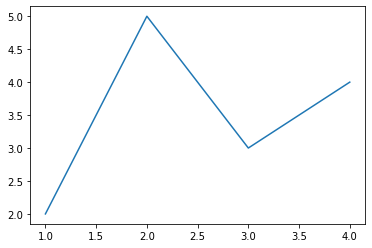

In [2]:
days = [1, 2, 3, 4]
cakes = [2, 5, 3, 4]
sns.lineplot(x=days, y=cakes)

Text(0, 0.5, 'cakes')

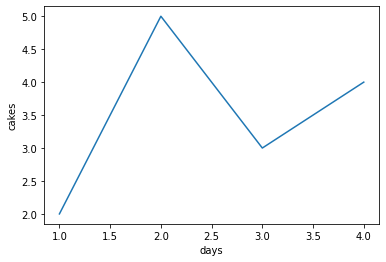

In [3]:
# (optional) use Matplotlib axis methods to add labels
ax = sns.lineplot(x=days, y=cakes)
ax.set_xlabel("days")
ax.set_ylabel("cakes")

In [4]:
df = pd.DataFrame({"days":days, "cakes":cakes})
df

,days,cakes
0,1,2
1,2,5
2,3,3
3,4,4


In [5]:
df.columns

Index(['days', 'cakes'], dtype='object')

<AxesSubplot:xlabel='days', ylabel='cakes'>

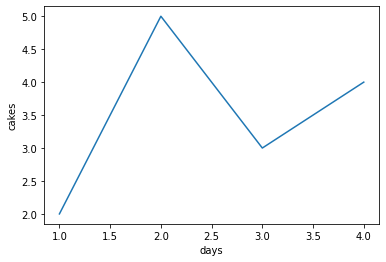

In [6]:
sns.lineplot(x="days", y="cakes", data=df, dashes='.')

In [7]:
# # ALT. hybrid approach
# sns.lineplot(x=df["days"], y=df["cakes"])

## More imports and notebooks settings

In [8]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
# Pandas setup
pd.set_option("display.precision", 2)

In [10]:
# Figures setup
sns.set_theme(
    context="paper",
    style="whitegrid",
    palette="colorblind",
    rc={'figure.figsize': (7,4)},
)

%config InlineBackend.figure_format = 'retina'

## Load the `students` dataset from CSV

In [11]:
import os
file_path = os.path.join("..", "datasets", "students.csv")
if os.path.exists(file_path):
    data_file = open(file_path)
else:
    import io
    data_file = io.StringIO("""
student_ID,background,curriculum,effort,score
1,arts,debate,10.96,75
2,science,lecture,8.69,75
3,arts,debate,8.6,67
4,arts,lecture,7.92,70.3
5,science,debate,9.9,76.1
6,business,debate,10.8,79.8
7,science,lecture,7.81,72.7
8,business,lecture,9.13,75.4
9,business,lecture,5.21,57
10,science,lecture,7.71,69
11,business,debate,9.82,70.4
12,arts,debate,11.53,96.2
13,science,debate,7.1,62.9
14,science,lecture,6.39,57.6
15,arts,debate,12,84.3
""")

In [12]:
students = pd.read_csv(data_file, index_col="student_ID")

## Let's look at the data...

In [13]:
students

,background,curriculum,effort,score
student_ID,,,,
1,arts,debate,10.96,75.0
2,science,lecture,8.69,75.0
3,arts,debate,8.60,67.0
4,arts,lecture,7.92,70.3
5,science,debate,9.90,76.1
6,business,debate,10.80,79.8
7,science,lecture,7.81,72.7
8,business,lecture,9.13,75.4
9,business,lecture,5.21,57.0


In [14]:
# what type of object is `students`?
type(students)

pandas.core.frame.DataFrame

In [15]:
# rows
students.index

Int64Index([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15], dtype='int64', name='student_ID')

In [16]:
# columns
students.columns

Index(['background', 'curriculum', 'effort', 'score'], dtype='object')

In [17]:
# info about memory and data types of each column
students.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15 entries, 1 to 15
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   background  15 non-null     object 
 1   curriculum  15 non-null     object 
 2   effort      15 non-null     float64
 3   score       15 non-null     float64
dtypes: float64(2), object(2)
memory usage: 600.0+ bytes


# Describing numeric data

Let's look at the `score` variable.

In [18]:
students["score"].count()

15

In [19]:
students["score"].sort_values().values

array([57. , 57.6, 62.9, 67. , 69. , 70.3, 70.4, 72.7, 75. , 75. , 75.4,
       76.1, 79.8, 84.3, 96.2])

In [20]:
# # ALT
# sorted(students['score'])

### Min, max, and median

In [21]:
students["score"].min()

57.0

In [22]:
students["score"].max()

96.2

In [23]:
students["score"].max() - students["score"].min()  # Range

39.2

In [24]:
students["score"].median()

72.7

<AxesSubplot:xlabel='score'>

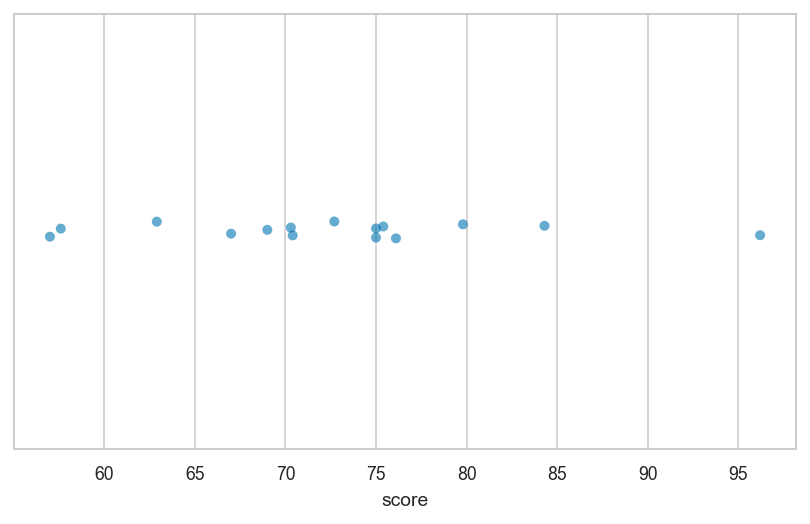

In [25]:
sns.stripplot(x="score", data=students, jitter=0.03, alpha=0.6)

In [26]:
# # ALT  also show mean via https://stackoverflow.com/a/67579487/127114
# with plt.rc_context({"figure.figsize":(7,2)}):
#     sns.stripplot(x="score", data=students, jitter=0.03, alpha=0.6)
#     color0 = sns.color_palette()[0]
#     sns.boxplot(showmeans=True,
#                 meanline=True,
#                 meanprops={'color': color0, 'ls': '-', 'lw': 2},
#                 medianprops={'visible': False},
#                 whiskerprops={'visible': False},
#                 zorder=10,
#                 x="score",
#                 data=students,
#                 showfliers=False,
#                 showbox=False,
#                 showcaps=False)

### Mean, variance, and standard deviation

In [27]:
students["score"].mean()

72.58

In [28]:
students["score"].var()  # sample variance, 1/(n-1) EE(x-mean)^2

99.58600000000001

In [29]:
students["score"].std()

9.979278531036199

In [30]:
# # ALT -- calculated using populaiton formulas
# students["score"].var(ddof=0)  # population variance, 1/n EE(x-mean)^2  (no bias-correction)
# students["score"].std(ddof=0)

## Histograms

In [31]:
students["score"].value_counts(bins=[50,60,70,80,90,100]).sort_index()

(49.999, 60.0]    2
(60.0, 70.0]      3
(70.0, 80.0]      8
(80.0, 90.0]      1
(90.0, 100.0]     1
Name: score, dtype: int64

In [32]:
# note mode is the bin 70--80, which contains 8 values

<AxesSubplot:xlabel='score', ylabel='Count'>

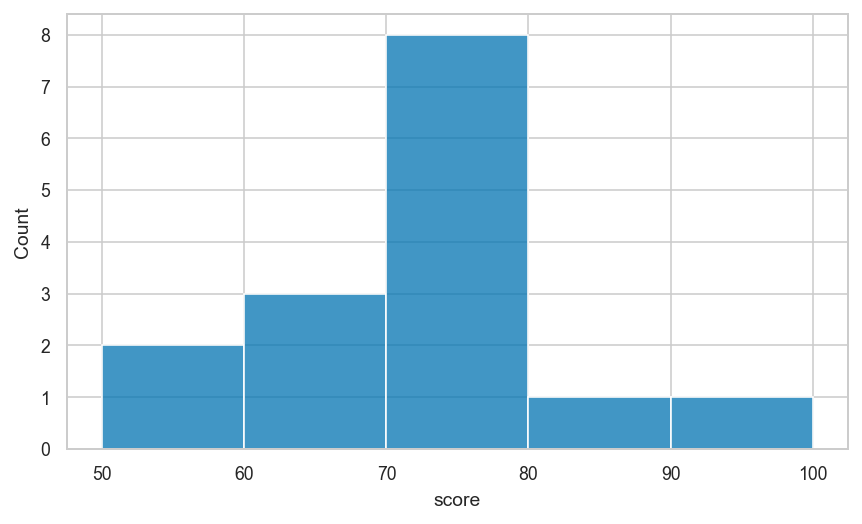

In [33]:
sns.histplot(x="score", data=students,
             bins=[50,60,70,80,90,100])

In [34]:
# # ALT using Pandas plotting capabilities
# students['score'].hist(bins=[50,60,70,80,90,100])

## Quartiles and box plots

In [35]:
Q1 = students["score"].quantile(0.25)
Q1

68.0

In [36]:
students["score"].quantile(0.5)  # Q2 = median

72.7

In [37]:
Q3 = students["score"].quantile(0.75)
Q3

75.75

In [38]:
IQR = Q3 - Q1
IQR

7.75

In [39]:
# # ALT use iqr function from scipy
# from scipy import stats
# stats.iqr(students["score"])

<AxesSubplot:xlabel='score'>

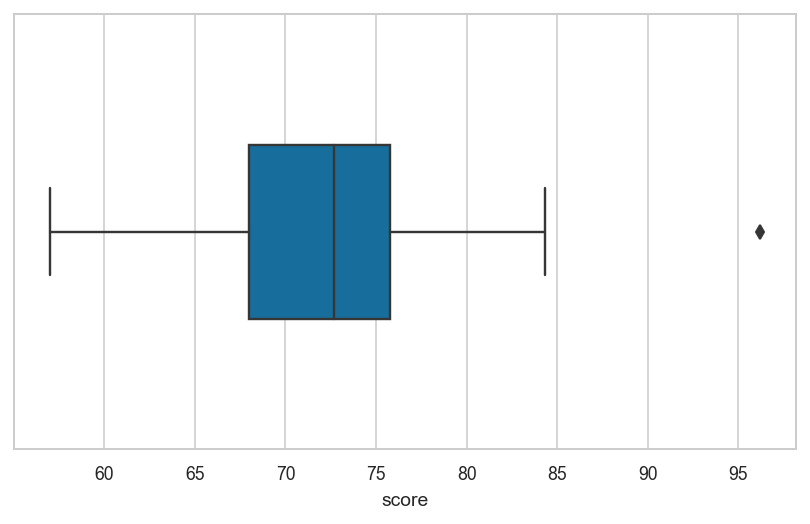

In [40]:
# box plot
sns.boxplot(x="score", data=students, width=0.4)

## All summary statistics

In [41]:
students["score"].describe()

count    15.00
mean     72.58
std       9.98
min      57.00
25%      68.00
50%      72.70
75%      75.75
max      96.20
Name: score, dtype: float64

In [42]:
students[["score"]].describe().T

,count,mean,std,min,25%,50%,75%,max
score,15.0,72.58,9.98,57.0,68.0,72.7,75.75,96.2


## Comparing two numeric variables


<AxesSubplot:xlabel='effort', ylabel='score'>

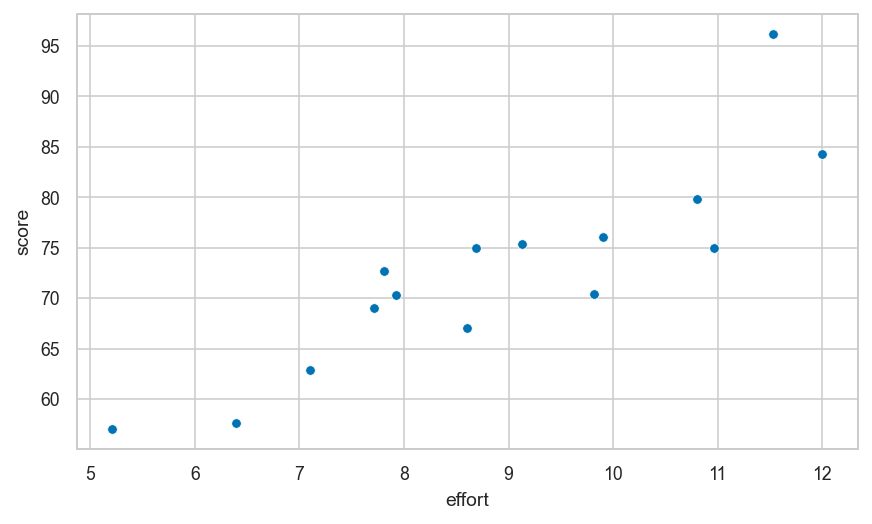

In [43]:
sns.scatterplot(x="effort", y="score", data=students)

### Covariance and correlation

In [44]:
students[["effort", "score"]].cov()

,effort,score
effort,3.8,17.10
score,17.1,99.59


In [45]:
students[["effort", "score"]].corr()

,effort,score
effort,1.00,0.88
score,0.88,1.00


## Multiple numerical variables

In [46]:
students.groupby("curriculum")["score"].describe()

,count,mean,std,min,25%,50%,75%,max
curriculum,,,,,,,,
debate,8.0,76.46,10.52,62.9,69.55,75.55,80.92,96.2
lecture,7.0,68.14,7.76,57.0,63.30,70.30,73.85,75.4


<AxesSubplot:xlabel='score', ylabel='curriculum'>

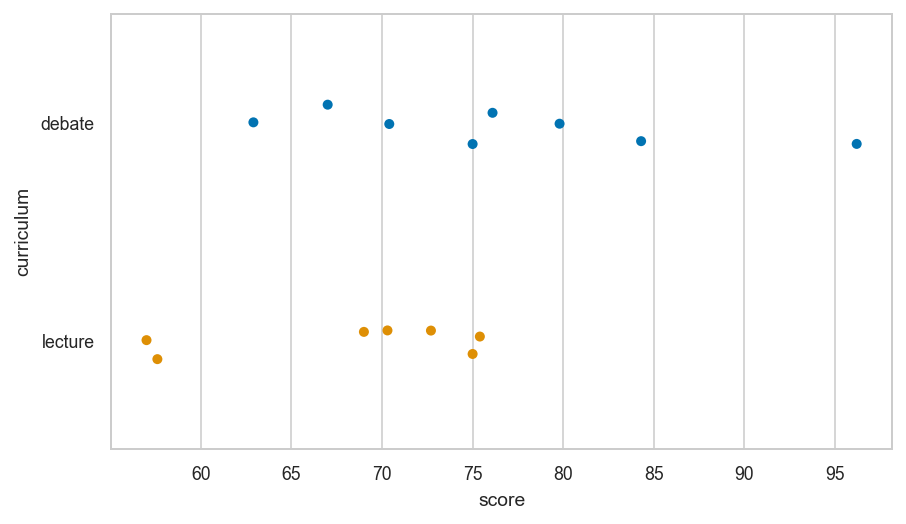

In [47]:
sns.stripplot(x="score", y="curriculum", data=students)

<AxesSubplot:xlabel='score', ylabel='curriculum'>

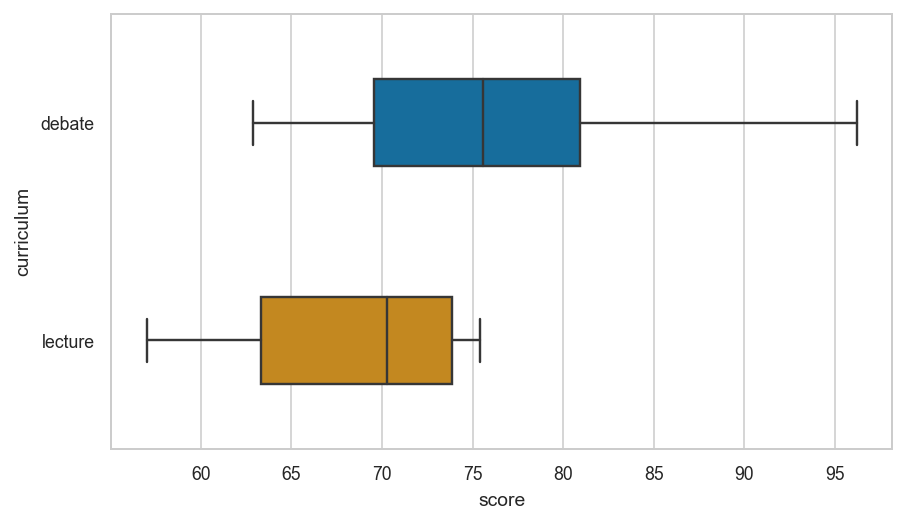

In [48]:
sns.boxplot(x="score", y="curriculum", data=students, width=0.4)

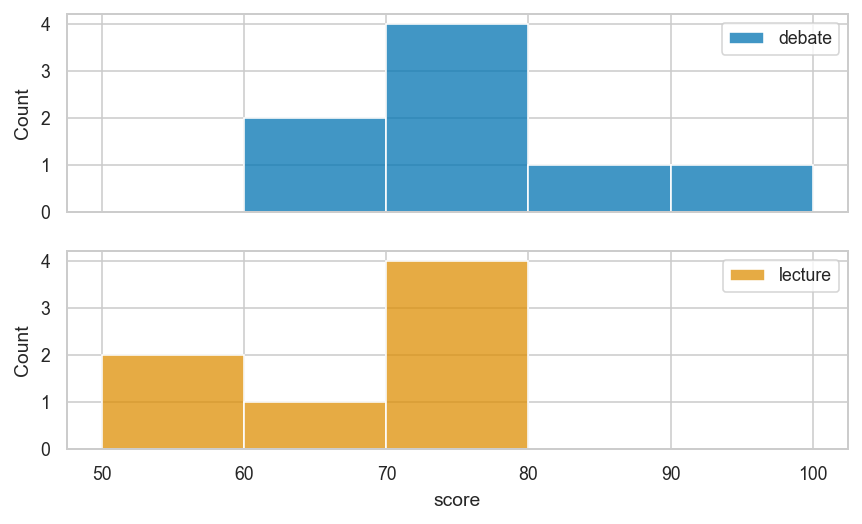

In [49]:
# histograms
fig, axs = plt.subplots(2, 1, sharex=True)

# prepare data
dscores = students[students["curriculum"]=="debate"]
lscores = students[students["curriculum"]=="lecture"]

# select colors to use for the two groups  
blue, yellow  = sns.color_palette()[0], sns.color_palette()[1]

# plot histograms
bins = [50, 60, 70, 80, 90, 100]
sns.histplot(x="score", data=dscores, color=blue, ax=axs[0], bins=bins)
sns.histplot(x="score", data=lscores, color=yellow, ax=axs[1], bins=bins)

# add labels
axs[0].legend(labels=["debate"])
axs[1].legend(labels=["lecture"])

In [50]:
# # ALT grouped bar charts
# sns.histplot(x="score", hue="curriculum", data=students,
#              bins=bins, multiple="dodge")

In [51]:
# # ALT use `displot` with curriculum as row-variable
# bins = [50, 60, 70, 80, 90, 100]
# sns.displot(x='score', row='curriculum', data=students,
#             hue='curriculum', alpha=0.8, bins=bins, aspect=3.3, height=2)

<AxesSubplot:xlabel='curriculum', ylabel='score'>

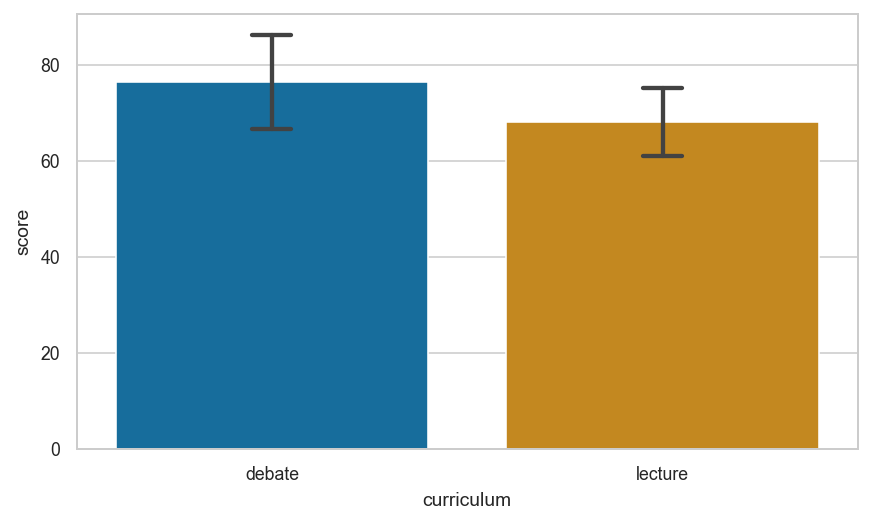

In [52]:
import numpy as np
from statistics import mean
sns.barplot(x="curriculum", y="score", data=students,
            estimator=np.mean, ci="sd", capsize=.1)

# Categorical data

In [53]:
students["background"]

student_ID
1         arts
2      science
3         arts
4         arts
5      science
6     business
7      science
8     business
9     business
10     science
11    business
12        arts
13     science
14     science
15        arts
Name: background, dtype: object

In [54]:
students["background"].describe()

count          15
unique          3
top       science
freq            6
Name: background, dtype: object

In [55]:
# frequencies
students["background"].value_counts().sort_index()

arts        5
business    4
science     6
Name: background, dtype: int64

In [56]:
# relative frequencies
students["background"].value_counts(normalize=True)

science     0.40
arts        0.33
business    0.27
Name: background, dtype: float64

In [57]:
# # ALT
# students["background"].value_counts() / len(students["background"])

In [58]:
# # ALT  combiend table with both frequency and relative frequency
# df2 = pd.DataFrame({
#     "frequency": students["background"].value_counts(),
#     "relative frequency": students["background"].value_counts(normalize=True)
# })
# df2

<AxesSubplot:xlabel='background', ylabel='count'>

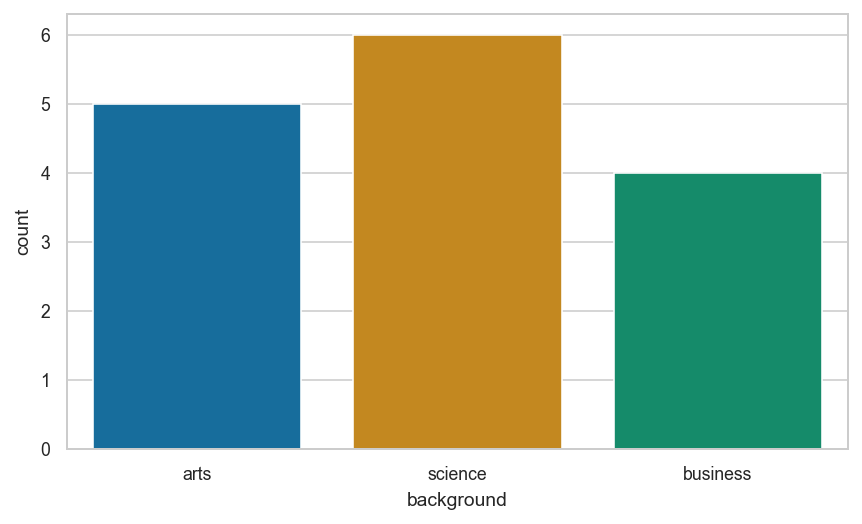

In [59]:
# bar chart of counts
sns.countplot(x="background", data=students)

In [60]:
# # ALT bar chart with relative frequencies
# df3 = (students["background"]
#  .value_counts(normalize=True)
#  .sort_index()
#  .rename("relative frequency")
#  .rename_axis("background")
#  .reset_index()
# )
# sns.barplot(x="background", y="relative frequency", data=df3)

## Comparing two categodescribeal variables

In [61]:
students[["background","curriculum"]]

,background,curriculum
student_ID,,
1,arts,debate
2,science,lecture
3,arts,debate
4,arts,lecture
5,science,debate
6,business,debate
7,science,lecture
8,business,lecture
9,business,lecture


In [62]:
# joint frequencies
pd.crosstab(index=students["curriculum"],
            columns=students["background"],
            margins=True, margins_name="TOTAL")

background,arts,business,science,TOTAL
curriculum,,,,
debate,4,2,2,8
lecture,1,2,4,7
TOTAL,5,4,6,15


In [63]:
# joint relative frequencies
pd.crosstab(index=students["curriculum"],
            columns=students["background"],
            margins=True, margins_name="TOTAL",
            normalize=True)

background,arts,business,science,TOTAL
curriculum,,,,
debate,0.27,0.13,0.13,0.53
lecture,0.07,0.13,0.27,0.47
TOTAL,0.33,0.27,0.40,1.00


<AxesSubplot:xlabel='background', ylabel='count'>

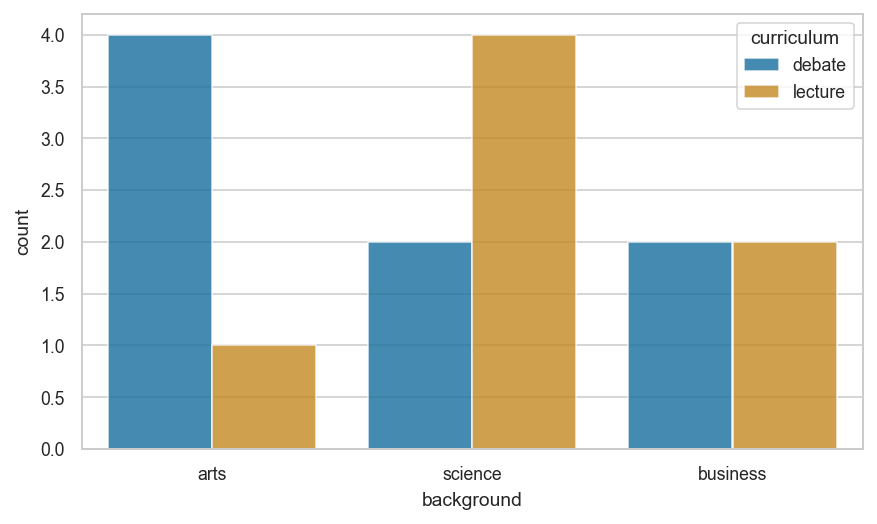

In [64]:
sns.countplot(x="background", hue="curriculum",
              data=students, alpha=0.8)

<AxesSubplot:xlabel='background', ylabel='Count'>

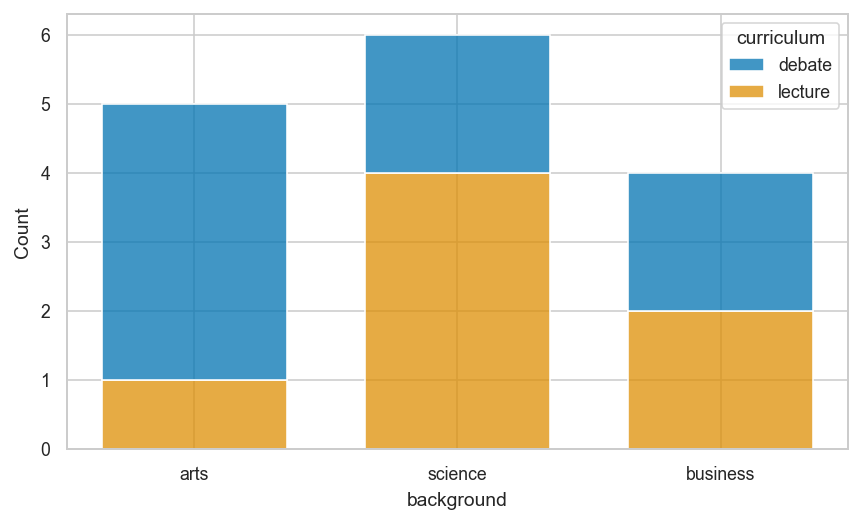

In [65]:
sns.histplot(x="background", hue="curriculum",
             data=students, multiple="stack", shrink=.7)

In [66]:
# # ALT  using displot
# sns.displot(data=students, x="background", hue="curriculum", multiple="stack", shrink=0.8)

In [67]:
# # ALT2  using Pandas plot function for crosstab
# pd.crosstab(
#     index=students["curriculum"],
#     columns=students["background"],
# ).T.plot(kind="bar", stacked=True, rot=0)

In [68]:
# # stacked joint relative frequencies
# sns.histplot(x="background", hue="curriculum",
#              data=students, shrink=.7,
#              multiple="stack", stat="proportion")

In [69]:
# curriculum relative frequencies conditional on background
pd.crosstab(index=students["curriculum"],
            columns=students["background"],
            margins=True, margins_name="TOTAL",
            normalize="columns")

background,arts,business,science,TOTAL
curriculum,,,,
debate,0.8,0.5,0.33,0.53
lecture,0.2,0.5,0.67,0.47


Text(0, 0.5, 'conditional relative frequency')

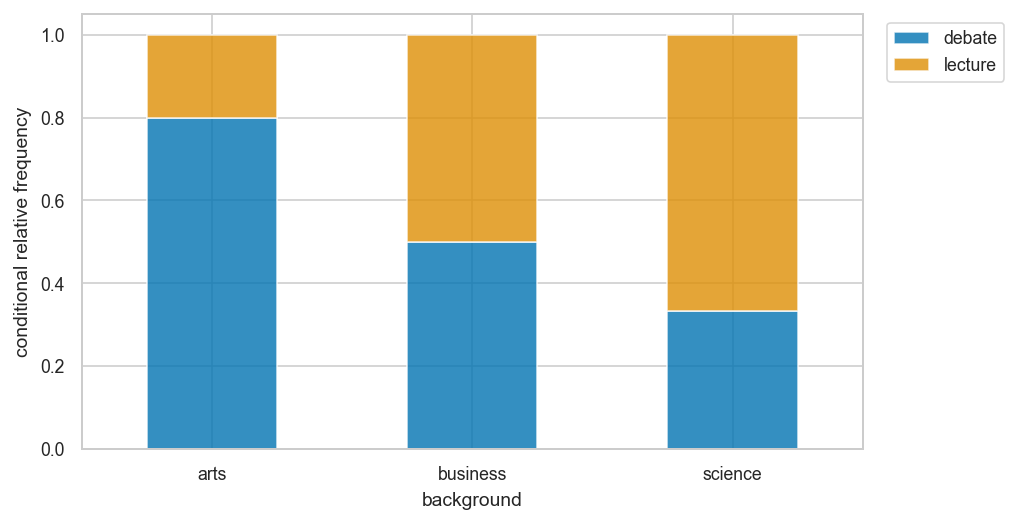

In [70]:
ct1 = pd.crosstab(
    index=students["curriculum"],
    columns=students["background"],
    normalize="columns",
)
axct1 = ct1.T.plot(kind="bar", stacked=True, rot=0, alpha=0.8)
plt.legend(loc = "upper left", bbox_to_anchor=(1.02,1))
plt.ylabel("conditional relative frequency")

In [71]:
# background relative frequencies conditional on curriculum
pd.crosstab(index=students["curriculum"],
            columns=students["background"],
            margins=True, margins_name="TOTAL",
            normalize="index")

background,arts,business,science
curriculum,,,
debate,0.50,0.25,0.25
lecture,0.14,0.29,0.57
TOTAL,0.33,0.27,0.40


Text(0.5, 0, 'conditional relative frequency')

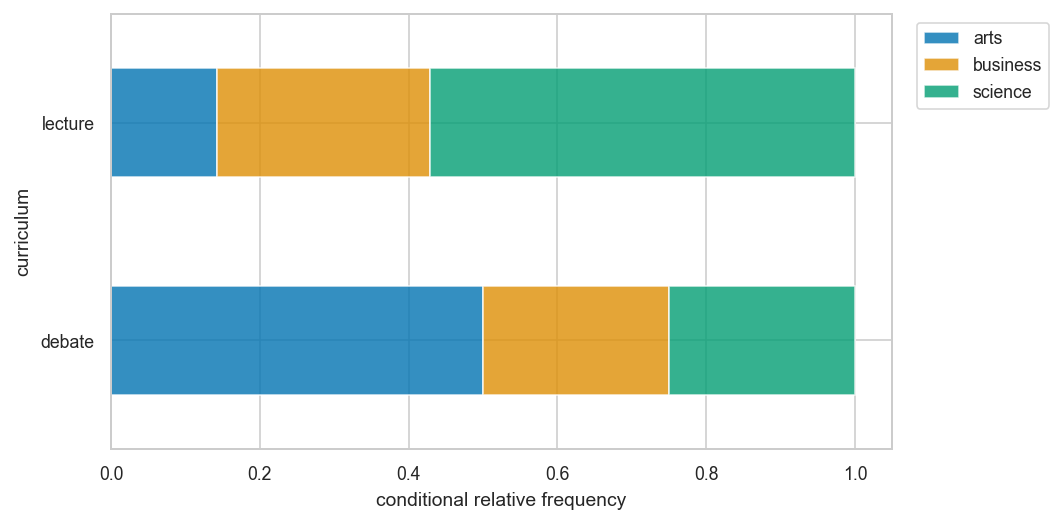

In [72]:
ct2 = pd.crosstab(
    index=students["curriculum"],
    columns=students["background"],
    normalize="index",
)
axct2 = ct2.plot(kind="barh", stacked=True, rot=0, alpha=0.8, )
plt.legend(loc = "upper left", bbox_to_anchor=(1.02,1))
plt.xlabel("conditional relative frequency")

## Explanations

In [73]:
import numpy as np

### Code for `median`

In [74]:
def median(values):
    n = len(values)
    svalues = sorted(values)
    if n % 2 == 1:            # Case A: n is odd
        mid = n // 2
        return svalues[mid]
    else:                     # Case B: n is even
        j = n // 2
        return 0.5*svalues[j-1] + 0.5*svalues[j]


In [75]:
assert median([1,300]) == np.median([1,300])

### Code for `quantile`

The function `quantile` below:
- Compute the ``q``th quantile of the list ``values`` using linear interpolation.
- Equivalent to ``quantile(values, q, method="linear")`` in `numpy`.
- Equivalent to ``quantile(values, q, type=7)`` in R.

In [76]:
def quantile(values, q):
    svalues = sorted(values)
    p = q * (len(values)-1)
    i = int(p)
    g = p - int(p)
    return (1-g)*svalues[i] + g*svalues[i+1]

In [77]:
arr = [21, 22, 24, 24, 26, 97]
assert quantile(arr, 0.33) == np.quantile(arr, 0.33)
assert quantile(arr, 0.25) == np.quantile(arr, 0.25)
assert quantile(arr, 0.75) == np.quantile(arr, 0.75)